<a href="https://colab.research.google.com/github/JCSnedeker/Covid_Infection_Estimation/blob/main/Infection_Estimates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/JCSnedeker/Covid_Infection_Estimation/main/all-states-history%20(1).csv")

In [ ]:
df.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-16,AK,A,181.0,181.0,2,NaN,921.0,921.0,146.0,13,NaN,NaN,1125104.0,7675,NaN,NaN,1115724.0,NaN,15.0,41041.0,NaN,603,0,NaN,NaN,NaN,NaN,49120.0,7165.0,NaN,0,1166145.0,8278,NaN,NaN,NaN,NaN,NaN,0,1166145.0,8278
1,2020-12-16,AL,A,4198.0,3704.0,74,494.0,29559.0,29559.0,2310.0,300,2380.0,NaN,1491279.0,6097,NaN,NaN,NaN,1364.0,NaN,305640.0,249849.0,4107,0,NaN,NaN,NaN,NaN,NaN,183625.0,NaN,0,1741128.0,8943,NaN,NaN,79047.0,NaN,1741128.0,8943,NaN,0
2,2020-12-16,AR,A+,3074.0,2725.0,58,349.0,10230.0,10230.0,1079.0,134,NaN,399.0,1722858.0,9979,NaN,NaN,1722858.0,1117.0,184.0,191504.0,163230.0,2306,0,NaN,3300.0,NaN,34344.0,NaN,167631.0,NaN,0,1886088.0,11617,NaN,21856.0,NaN,187871.0,NaN,0,1886088.0,11617
3,2020-12-16,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2020-12-16,AZ,A+,7530.0,6919.0,108,611.0,31468.0,31468.0,3809.0,202,NaN,882.0,2148190.0,11008,NaN,NaN,NaN,NaN,602.0,429219.0,412450.0,4837,0,NaN,NaN,NaN,NaN,NaN,63697.0,NaN,0,4409083.0,34631,379855.0,NaN,NaN,NaN,2560640.0,15314,4409083.0,34631


In [ ]:
states=[]
for i in range(56):
  rows=df.loc[i]
  states.append(rows['state'])
print(states)

['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


In [ ]:
#practicing parsing
df_AZ=df[df["state"]=='AZ']

In [ ]:
df_AZ.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
4,2020-12-16,AZ,A+,7530.0,6919.0,108,611.0,31468.0,31468.0,3809.0,202,NaN,882.0,2148190.0,11008,NaN,NaN,NaN,NaN,602.0,429219.0,412450.0,4837,0,NaN,NaN,NaN,NaN,NaN,63697.0,NaN,0,4409083.0,34631,379855.0,NaN,NaN,NaN,2560640.0,15314,4409083.0,34631
60,2020-12-15,AZ,A+,7422.0,6835.0,64,587.0,31266.0,31266.0,3702.0,124,NaN,863.0,2137182.0,10254,NaN,NaN,NaN,NaN,579.0,424382.0,408144.0,4134,0,NaN,NaN,NaN,NaN,NaN,62839.0,NaN,0,4374452.0,29759,378518.0,NaN,NaN,NaN,2545326.0,14104,4374452.0,29759
116,2020-12-14,AZ,A+,7358.0,6782.0,1,576.0,31142.0,31142.0,3677.0,193,NaN,829.0,2126928.0,7223,NaN,NaN,NaN,NaN,542.0,420248.0,404294.0,11806,0,NaN,NaN,NaN,NaN,NaN,62118.0,NaN,0,4344693.0,38805,377958.0,NaN,NaN,NaN,2531222.0,18526,4344693.0,38805
172,2020-12-13,AZ,A+,7357.0,6779.0,35,578.0,30949.0,30949.0,3622.0,262,NaN,831.0,2119705.0,20540,NaN,NaN,NaN,NaN,537.0,408442.0,392991.0,5853,0,NaN,NaN,NaN,NaN,NaN,61399.0,NaN,0,4305888.0,60734,376908.0,NaN,NaN,NaN,2512696.0,25833,4305888.0,60734
228,2020-12-12,AZ,A+,7322.0,6749.0,77,573.0,30687.0,30687.0,3534.0,385,NaN,799.0,2099165.0,18295,NaN,NaN,NaN,NaN,515.0,402589.0,387698.0,8077,0,NaN,NaN,NaN,NaN,NaN,60646.0,NaN,0,4245154.0,57294,375676.0,NaN,NaN,NaN,2486863.0,26042,4245154.0,57294


In [ ]:
#attempt to make dataframe for each state
for i in range(56):
  a=states[i]
  name='df_'+a
  print(name)
  name=df[df['state']==a]

df_AK
df_AL
df_AR
df_AS
df_AZ
df_CA
df_CO
df_CT
df_DC
df_DE
df_FL
df_GA
df_GU
df_HI
df_IA
df_ID
df_IL
df_IN
df_KS
df_KY
df_LA
df_MA
df_MD
df_ME
df_MI
df_MN
df_MO
df_MP
df_MS
df_MT
df_NC
df_ND
df_NE
df_NH
df_NJ
df_NM
df_NV
df_NY
df_OH
df_OK
df_OR
df_PA
df_PR
df_RI
df_SC
df_SD
df_TN
df_TX
df_UT
df_VA
df_VI
df_VT
df_WA
df_WI
df_WV
df_WY


In [ ]:
df_AZ.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
4,2020-12-16,AZ,A+,7530.0,6919.0,108,611.0,31468.0,31468.0,3809.0,202,NaN,882.0,2148190.0,11008,NaN,NaN,NaN,NaN,602.0,429219.0,412450.0,4837,0,NaN,NaN,NaN,NaN,NaN,63697.0,NaN,0,4409083.0,34631,379855.0,NaN,NaN,NaN,2560640.0,15314,4409083.0,34631
60,2020-12-15,AZ,A+,7422.0,6835.0,64,587.0,31266.0,31266.0,3702.0,124,NaN,863.0,2137182.0,10254,NaN,NaN,NaN,NaN,579.0,424382.0,408144.0,4134,0,NaN,NaN,NaN,NaN,NaN,62839.0,NaN,0,4374452.0,29759,378518.0,NaN,NaN,NaN,2545326.0,14104,4374452.0,29759
116,2020-12-14,AZ,A+,7358.0,6782.0,1,576.0,31142.0,31142.0,3677.0,193,NaN,829.0,2126928.0,7223,NaN,NaN,NaN,NaN,542.0,420248.0,404294.0,11806,0,NaN,NaN,NaN,NaN,NaN,62118.0,NaN,0,4344693.0,38805,377958.0,NaN,NaN,NaN,2531222.0,18526,4344693.0,38805
172,2020-12-13,AZ,A+,7357.0,6779.0,35,578.0,30949.0,30949.0,3622.0,262,NaN,831.0,2119705.0,20540,NaN,NaN,NaN,NaN,537.0,408442.0,392991.0,5853,0,NaN,NaN,NaN,NaN,NaN,61399.0,NaN,0,4305888.0,60734,376908.0,NaN,NaN,NaN,2512696.0,25833,4305888.0,60734
228,2020-12-12,AZ,A+,7322.0,6749.0,77,573.0,30687.0,30687.0,3534.0,385,NaN,799.0,2099165.0,18295,NaN,NaN,NaN,NaN,515.0,402589.0,387698.0,8077,0,NaN,NaN,NaN,NaN,NaN,60646.0,NaN,0,4245154.0,57294,375676.0,NaN,NaN,NaN,2486863.0,26042,4245154.0,57294


In [ ]:
state_cases={}
state_pos={}


In [ ]:
for i in range(56):
  a=states[i]
  state_cases[a]=[]
  state_pos[a]=[]

In [ ]:
print(state_cases)

{'AK': [], 'AL': [], 'AR': [], 'AS': [], 'AZ': [], 'CA': [], 'CO': [], 'CT': [], 'DC': [], 'DE': [], 'FL': [], 'GA': [], 'GU': [], 'HI': [], 'IA': [], 'ID': [], 'IL': [], 'IN': [], 'KS': [], 'KY': [], 'LA': [], 'MA': [], 'MD': [], 'ME': [], 'MI': [], 'MN': [], 'MO': [], 'MP': [], 'MS': [], 'MT': [], 'NC': [], 'ND': [], 'NE': [], 'NH': [], 'NJ': [], 'NM': [], 'NV': [], 'NY': [], 'OH': [], 'OK': [], 'OR': [], 'PA': [], 'PR': [], 'RI': [], 'SC': [], 'SD': [], 'TN': [], 'TX': [], 'UT': [], 'VA': [], 'VI': [], 'VT': [], 'WA': [], 'WI': [], 'WV': [], 'WY': []}


In [ ]:
#Trying to add different column from one indexed
#for i in range(16196):
#  if df["state"]=="AZ":
#    state_cases[AZ].append(df['positiveIncrease'])

In [ ]:
cases=[]
for i in range(56):
  rows=df.loc[i]
  cases.append(rows['positive'])
print(cases)

[41041.0, 305640.0, 191504.0, 0.0, 429219.0, 1671081.0, 296716.0, 157781.0, 25602.0, 47929.0, 1136024.0, 488338.0, 7168.0, 19954.0, 225050.0, 124019.0, 870600.0, 440850.0, 194569.0, 230693.0, 275545.0, 304112.0, 241767.0, 17311.0, 482815.0, 386412.0, 353038.0, 113.0, 185643.0, 74644.0, 451874.0, 88686.0, 150861.0, 33433.0, 415075.0, 124357.0, 194098.0, 804555.0, 584766.0, 245229.0, 96092.0, 519369.0, 63686.0, 76209.0, 260119.0, 92603.0, 484285.0, 1519340.0, 240715.0, 292240.0, 1828.0, 6009.0, 205069.0, 478162.0, 66849.0, 40310.0]


In [ ]:
case_by_state={}
for i in range(56):
  case_by_state[states[i]]=cases[i]

In [ ]:
print(case_by_state)

{'AK': 41041.0, 'AL': 305640.0, 'AR': 191504.0, 'AS': 0.0, 'AZ': 429219.0, 'CA': 1671081.0, 'CO': 296716.0, 'CT': 157781.0, 'DC': 25602.0, 'DE': 47929.0, 'FL': 1136024.0, 'GA': 488338.0, 'GU': 7168.0, 'HI': 19954.0, 'IA': 225050.0, 'ID': 124019.0, 'IL': 870600.0, 'IN': 440850.0, 'KS': 194569.0, 'KY': 230693.0, 'LA': 275545.0, 'MA': 304112.0, 'MD': 241767.0, 'ME': 17311.0, 'MI': 482815.0, 'MN': 386412.0, 'MO': 353038.0, 'MP': 113.0, 'MS': 185643.0, 'MT': 74644.0, 'NC': 451874.0, 'ND': 88686.0, 'NE': 150861.0, 'NH': 33433.0, 'NJ': 415075.0, 'NM': 124357.0, 'NV': 194098.0, 'NY': 804555.0, 'OH': 584766.0, 'OK': 245229.0, 'OR': 96092.0, 'PA': 519369.0, 'PR': 63686.0, 'RI': 76209.0, 'SC': 260119.0, 'SD': 92603.0, 'TN': 484285.0, 'TX': 1519340.0, 'UT': 240715.0, 'VA': 292240.0, 'VI': 1828.0, 'VT': 6009.0, 'WA': 205069.0, 'WI': 478162.0, 'WV': 66849.0, 'WY': 40310.0}


In [ ]:
pos_rate=[]
for i in range(56):
  rows=df.loc[i]
  rate=rows['positive']*100/rows['negative']
  pos_rate.append(rate)
print(pos_rate)

[3.647751674511867, 20.495158853574683, 11.115483690472459, 0.0, 19.980495207593368, 6.3110842079514375, 17.441437374391096, 4.249867343997888, 3.312948215935589, 11.26246581007792, 16.521493412557263, 11.279133955566026, 8.458116511498933, 6.760561471507997, 24.836337310678797, 30.411423134643112, 7.783855928748303, 21.816567625668576, 26.88546019323031, 8.381521581165527, 7.679438185462564, 8.879786566502188, 10.219059244819185, 1.7470558611801583, 6.846714926849633, 15.978061446639522, 22.152668795520245, 0.6483447128349303, 17.194579775114388, 11.285501538368498, 7.945776407159452, 31.77069899406758, 23.09730936348855, 7.59991180074242, 6.355906249712888, 7.568663419455635, 21.797204179356566, 3.712293782796704, 9.058130462321454, 11.36036304390224, 4.275247415506781, 16.82952270193149, 20.814322879217706, 14.78382661899672, 10.27506809056094, 35.20879354855881, 10.354603226596867, 13.82180179222921, 19.50037750767167, 8.283136798736555, 6.130936409981218, 2.5019881833209117, 6.395

In [ ]:
pos_rate_by_state={}
for i in range(56):
  pos_rate_by_state[states[i]]=pos_rate[i]

In [ ]:
print(pos_rate_by_state)

{'AK': 3.647751674511867, 'AL': 20.495158853574683, 'AR': 11.115483690472459, 'AS': 0.0, 'AZ': 19.980495207593368, 'CA': 6.3110842079514375, 'CO': 17.441437374391096, 'CT': 4.249867343997888, 'DC': 3.312948215935589, 'DE': 11.26246581007792, 'FL': 16.521493412557263, 'GA': 11.279133955566026, 'GU': 8.458116511498933, 'HI': 6.760561471507997, 'IA': 24.836337310678797, 'ID': 30.411423134643112, 'IL': 7.783855928748303, 'IN': 21.816567625668576, 'KS': 26.88546019323031, 'KY': 8.381521581165527, 'LA': 7.679438185462564, 'MA': 8.879786566502188, 'MD': 10.219059244819185, 'ME': 1.7470558611801583, 'MI': 6.846714926849633, 'MN': 15.978061446639522, 'MO': 22.152668795520245, 'MP': 0.6483447128349303, 'MS': 17.194579775114388, 'MT': 11.285501538368498, 'NC': 7.945776407159452, 'ND': 31.77069899406758, 'NE': 23.09730936348855, 'NH': 7.59991180074242, 'NJ': 6.355906249712888, 'NM': 7.568663419455635, 'NV': 21.797204179356566, 'NY': 3.712293782796704, 'OH': 9.058130462321454, 'OK': 11.360363043902

In [ ]:
pos_rate_by_state.pop("AS")
case_by_state.pop("AS")
pos_rate_by_state.pop("GU")
case_by_state.pop("GU")
pos_rate_by_state.pop("MP")
case_by_state.pop("MP")
pos_rate_by_state.pop("PR")
case_by_state.pop("PR")
pos_rate_by_state.pop("VI")
case_by_state.pop("VI")

1828.0

In [ ]:
print(pos_rate_by_state)

{'AK': 3.647751674511867, 'AL': 20.495158853574683, 'AR': 11.115483690472459, 'AZ': 19.980495207593368, 'CA': 6.3110842079514375, 'CO': 17.441437374391096, 'CT': 4.249867343997888, 'DC': 3.312948215935589, 'DE': 11.26246581007792, 'FL': 16.521493412557263, 'GA': 11.279133955566026, 'HI': 6.760561471507997, 'IA': 24.836337310678797, 'ID': 30.411423134643112, 'IL': 7.783855928748303, 'IN': 21.816567625668576, 'KS': 26.88546019323031, 'KY': 8.381521581165527, 'LA': 7.679438185462564, 'MA': 8.879786566502188, 'MD': 10.219059244819185, 'ME': 1.7470558611801583, 'MI': 6.846714926849633, 'MN': 15.978061446639522, 'MO': 22.152668795520245, 'MS': 17.194579775114388, 'MT': 11.285501538368498, 'NC': 7.945776407159452, 'ND': 31.77069899406758, 'NE': 23.09730936348855, 'NH': 7.59991180074242, 'NJ': 6.355906249712888, 'NM': 7.568663419455635, 'NV': 21.797204179356566, 'NY': 3.712293782796704, 'OH': 9.058130462321454, 'OK': 11.36036304390224, 'OR': 4.275247415506781, 'PA': 16.82952270193149, 'RI': 14

In [ ]:
df_pop=pd.read_csv("https://raw.githubusercontent.com/JCSnedeker/Covid_Infection_Estimation/main/nst-est2019-01.csv")

In [ ]:
df_pop.head(10)

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,NaN,"April 1, 2010",NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,United States,NaN,"308,745,538","308,758,105","309,321,666","311,556,874","313,830,990","315,993,715","318,301,008","320,635,163","322,941,311","324,985,539","326,687,501","328,239,523"
4,Northeast,NaN,"55,317,240","55,318,443","55,380,134","55,604,223","55,775,216","55,901,806","56,006,011","56,034,684","56,042,330","56,059,240","56,046,620","55,982,803"
5,Midwest,NaN,"66,927,001","66,929,725","66,974,416","67,157,800","67,336,743","67,560,379","67,745,167","67,860,583","67,987,540","68,126,781","68,236,628","68,329,004"
6,South,NaN,"114,555,744","114,563,030","114,866,680","116,006,522","117,241,208","118,364,400","119,624,037","120,997,341","122,351,760","123,542,189","124,569,433","125,580,448"
7,West,NaN,"71,945,553","71,946,907","72,100,436","72,788,329","73,477,823","74,167,130","74,925,793","75,742,555","76,559,681","77,257,329","77,834,820","78,347,268"
8,.Alaska,AK,"710,231","710,249","713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
9,.Alabama,AL,"4,779,736","4,780,125","4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"


In [ ]:
names=[]
pops=[]
state_pop={}
for i in range(8,59):
  rows=df_pop.loc[i]
  names.append(rows[1])
  pops.append(rows[13])
for i in range(51):
  state_pop[names[i]]=pops[i]
print(state_pop)

{'AK': '731,545', 'AL': '4,903,185', 'AR': '3,017,804', 'AZ': '7,278,717', 'CA': '39,512,223', 'CO': '5,758,736', 'CT': '3,565,287', 'DC': '705,749', 'DE': '973,764', 'FL': '21,477,737', 'GA': '10,617,423', 'HI': '1,415,872', 'IA': '3,155,070', 'ID': '1,787,065', 'IL': '12,671,821', 'IN': '6,732,219', 'KS': '2,913,314', 'KY': '4,467,673', 'LA': '4,648,794', 'MA': '6,892,503', 'MD': '6,045,680', 'ME': '1,344,212', 'MI': '9,986,857', 'MN': '5,639,632', 'MO': '6,137,428', 'MS': '2,976,149', 'MT': '1,068,778', 'NC': '10,488,084', 'ND': '762,062', 'NE': '1,934,408', 'NH': '1,359,711', 'NJ': '8,882,190', 'NM': '2,096,829', 'NV': '3,080,156', 'NY': '19,453,561', 'OH': '11,689,100', 'OK': '3,956,971', 'OR': '4,217,737', 'PA': '12,801,989', 'RI': '1,059,361', 'SC': '5,148,714', 'SD': '884,659', 'TN': '6,829,174', 'TX': '28,995,881', 'UT': '3,205,958', 'VA': '8,535,519', 'VT': '623,989', 'WA': '7,614,893', 'WI': '5,822,434', 'WV': '1,792,147', 'WY': '578,759'}


In [ ]:
c2=[]
for value in case_by_state.values():
  c2.append(value)
print(c2)

p2=[]
for value in pos_rate_by_state.values():
  p2.append(value)
print(p2)

[41041.0, 305640.0, 191504.0, 429219.0, 1671081.0, 296716.0, 157781.0, 25602.0, 47929.0, 1136024.0, 488338.0, 19954.0, 225050.0, 124019.0, 870600.0, 440850.0, 194569.0, 230693.0, 275545.0, 304112.0, 241767.0, 17311.0, 482815.0, 386412.0, 353038.0, 185643.0, 74644.0, 451874.0, 88686.0, 150861.0, 33433.0, 415075.0, 124357.0, 194098.0, 804555.0, 584766.0, 245229.0, 96092.0, 519369.0, 76209.0, 260119.0, 92603.0, 484285.0, 1519340.0, 240715.0, 292240.0, 6009.0, 205069.0, 478162.0, 66849.0, 40310.0]
[3.647751674511867, 20.495158853574683, 11.115483690472459, 19.980495207593368, 6.3110842079514375, 17.441437374391096, 4.249867343997888, 3.312948215935589, 11.26246581007792, 16.521493412557263, 11.279133955566026, 6.760561471507997, 24.836337310678797, 30.411423134643112, 7.783855928748303, 21.816567625668576, 26.88546019323031, 8.381521581165527, 7.679438185462564, 8.879786566502188, 10.219059244819185, 1.7470558611801583, 6.846714926849633, 15.978061446639522, 22.152668795520245, 17.19457977

In [ ]:
per_cap=[]
names=[]
infect={}
for i in range(51):
  rows=df_pop.loc[i+8]
  names.append(rows[1])
  count=float(c2[i])
  p=pops[i]
  p=p.replace(",","")
  population=float(p)
  #print(population)
  per=count*100/population
  #print(per)
  per_cap.append(per)
for i in range(51):
  infect[names[i]]=per_cap[i]
print(infect)

{'AK': 5.610181191861061, 'AL': 6.233499245898329, 'AR': 6.34580642082786, 'AZ': 5.896904633055524, 'CA': 4.2292760900848325, 'CO': 5.1524501209987745, 'CT': 4.425478229382375, 'DC': 3.627635320772683, 'DE': 4.922034497064997, 'FL': 5.28930957670261, 'GA': 4.599402322013543, 'HI': 1.4093081860507164, 'IA': 7.132963769425084, 'ID': 6.939814724142659, 'IL': 6.870362199718572, 'IN': 6.54836094904221, 'KS': 6.6786141143728415, 'KY': 5.163605304148267, 'LA': 5.927236182115189, 'MA': 4.412214256562529, 'MD': 3.99900424766114, 'ME': 1.2878176954230434, 'MI': 4.834503988592207, 'MN': 6.851723658564956, 'MO': 5.7522141196605485, 'MS': 6.237691728471928, 'MT': 6.984050944162399, 'NC': 4.308451381586951, 'ND': 11.6376357829153, 'NE': 7.798820104135219, 'NH': 2.4588313251860137, 'NJ': 4.673115526688801, 'NM': 5.9307172878665835, 'NV': 6.301563946761138, 'NY': 4.135772365789482, 'OH': 5.0026605983352015, 'OK': 6.197391893951207, 'OR': 2.278283354320101, 'PA': 4.0569399020730295, 'RI': 7.19386498087

In [ ]:
import plotly.express as px
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

Text(0, 0.5, 'Positive Test Rate (% of all tests)')

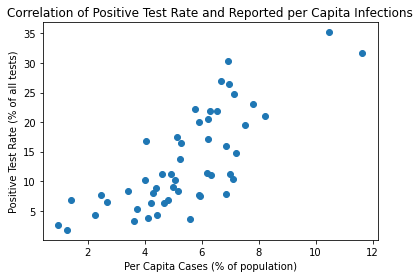

In [ ]:
x=[]
y=[]
for i in range(51):
  x.append(per_cap[i])
  y.append(p2[i])

#def fsigmoid(x, a, b):
#    return 1.0 / (1.0 + np.exp(-a*(x-b)))

#popt, pcov = curve_fit(fsigmoid, x, y, method='dogbox', bounds=([0., 12.],[0.01, 24.]))
#x_fit = np.linspace(0, 12, 50)
#y_fit = fsigmoid(x_fit, *popt)

fig, ax = plt.subplots()
ax.scatter(x,y)
#ax.plot(x_fit,y_fit)
ax.set_title("Correlation of Positive Test Rate and Reported per Capita Infections")
plt.xlabel('Per Capita Cases (% of population)')
plt.ylabel("Positive Test Rate (% of all tests)")

In [ ]:
a=[]
num=0
for i in range(51):
  if y[i]<10:
    a.append(x[i]*1.9)
  else:
    a.append(x[i]*1.9+x[i]*(y[i]-10)/10)
  num=num+y[i]
print(num/50)

13.59512639456281


Text(0, 0.5, 'Per Capita Estimation of Cases (% of population)')

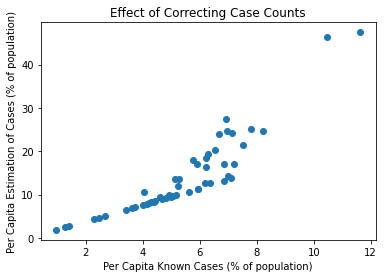

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,a)
ax.set_title("Effect of Correcting Case Counts")
plt.xlabel('Per Capita Known Cases (% of population)')
plt.ylabel("Per Capita Estimation of Cases (% of population)")

Text(0, 0.5, 'Positive Test Rate (% of all tests)')

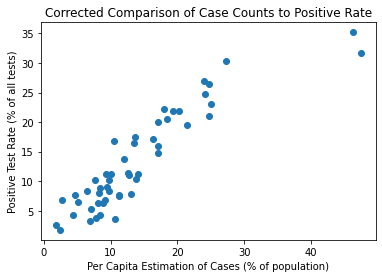

In [ ]:
fig, ax = plt.subplots()
ax.scatter(a,y)
ax.set_title("Corrected Comparison of Case Counts to Positive Rate")
plt.xlabel('Per Capita Estimation of Cases (% of population)')
plt.ylabel("Positive Test Rate (% of all tests)")

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!pip install folium
!pip install mapclassify

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
import geopandas as gpd
import mapclassify

In [ ]:
gdf_states=gpd.read_file("tl_2019_us_state.shp")

In [ ]:
gdf_states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [ ]:
gdf_states("STATEFP")=gdf_states("STATEFP").astype(int)

SyntaxError: ignored

In [ ]:
gdf_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    56 non-null     object  
 1   DIVISION  56 non-null     object  
 2   STATEFP   56 non-null     object  
 3   STATENS   56 non-null     object  
 4   GEOID     56 non-null     object  
 5   STUSPS    56 non-null     object  
 6   NAME      56 non-null     object  
 7   LSAD      56 non-null     object  
 8   MTFCC     56 non-null     object  
 9   FUNCSTAT  56 non-null     object  
 10  ALAND     56 non-null     int64   
 11  AWATER    56 non-null     int64   
 12  INTPTLAT  56 non-null     object  
 13  INTPTLON  56 non-null     object  
 14  geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 6.7+ KB
